In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Data file paths
mushroom_path = "../secondary_data_no_miss.csv"

# Read the data files
mushroom_data = pd.read_csv(mushroom_path, sep = ";")

mushroom_data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,1.26,x,g,y,f,d,c,w,5.04,1.73,y,f,f,d,a
1,e,10.32,f,e,b,f,a,c,b,4.68,19.44,w,t,f,d,a
2,p,0.92,x,g,p,f,a,c,p,4.59,1.15,k,f,f,d,u
3,p,4.27,x,t,p,f,x,c,w,4.55,6.52,w,f,f,d,a
4,e,3.08,f,s,w,f,d,d,w,2.67,5.18,w,f,f,m,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,12.79,x,e,n,t,p,c,e,9.60,25.61,y,f,f,d,u
61065,p,2.42,x,d,w,f,a,d,p,3.52,2.20,w,f,f,g,u
61066,e,12.33,s,t,u,f,s,c,u,7.71,21.99,u,f,f,d,a
61067,p,3.85,s,w,u,f,a,c,u,5.32,5.59,u,f,f,l,a


In [5]:
# replace all letters with actual value

mushroom_data = mushroom_data.replace(
    {
    'class': {'p': 'poisonous', 'e': 'edible'},
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 's': 'sunken', 'p': 'spherical', 'o': 'others'},
    'cap-surface': {'i': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth', 'd': 'dry', 'h': 'shiny', 'l': 'leathery', 'k': 'silky', 't': 'sticky', 'w': 'wrinkled', 'e': 'fleshy'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black'},
    'gill-attachment': {'a': 'adnate', 'x': 'adnexed', 'd': 'decurrent', 'e': 'free', 's': 'sinuate', 'p': 'pores', 'f': 'none', '?': 'unknown'},
    'gill-spacing': {'c': 'close', 'd': 'distant', 'f': 'none'},
    'gill-color': {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black', 'f': 'none'},
    'stem-color': {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black', 'f': 'none'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'r': 'flaring', 'g': 'grooved', 'l': 'large', 'p': 'pendant', 's': 'sheathing', 'z': 'zone', 'y': 'scaly', 'm': 'movable', 'f': 'none', '?': 'unknown'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'h': 'heaths', 'u': 'urban', 'w': 'waste', 'd': 'woods'},
    'season': {'s': 'spring', 'u': 'summer', 'a': 'autumn', 'w': 'winter'}
    })

# convert t/f columns to boolean.
mushroom_data['does-bruise-or-bleed'] = mushroom_data['does-bruise-or-bleed']=='t'
mushroom_data['has-ring'] = mushroom_data['has-ring']=='t'
mushroom_data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,edible,1.26,convex,grooves,yellow,False,decurrent,close,white,5.04,1.73,yellow,False,none,woods,autumn
1,edible,10.32,flat,fleshy,buff,False,adnate,close,buff,4.68,19.44,white,True,none,woods,autumn
2,poisonous,0.92,convex,grooves,pink,False,adnate,close,pink,4.59,1.15,black,False,none,woods,summer
3,poisonous,4.27,convex,sticky,pink,False,adnexed,close,white,4.55,6.52,white,False,none,woods,autumn
4,edible,3.08,flat,smooth,white,False,decurrent,distant,white,2.67,5.18,white,False,none,meadows,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,poisonous,12.79,convex,fleshy,brown,True,pores,close,red,9.60,25.61,yellow,False,none,woods,summer
61065,poisonous,2.42,convex,dry,white,False,adnate,distant,pink,3.52,2.20,white,False,none,grasses,summer
61066,edible,12.33,sunken,sticky,purple,False,sinuate,close,purple,7.71,21.99,purple,False,none,woods,autumn
61067,poisonous,3.85,sunken,wrinkled,purple,False,adnate,close,purple,5.32,5.59,purple,False,none,leaves,autumn


## Run KNN on the three original quantitative data columns with standard and MinMax scalers

In [6]:
# Establish X and y

y = mushroom_data["class"]
target_names = ["edible", "poisonous"]

# Need to drop all non-integer columns for KNN
# X = mushroom_data.drop("class", axis=1)
X = mushroom_data[["cap-diameter", "stem-height", "stem-width"]]
X.head()

,cap-diameter,stem-height,stem-width
0,1.26,5.04,1.73
1,10.32,4.68,19.44
2,0.92,4.59,1.15
3,4.27,4.55,6.52
4,3.08,2.67,5.18


k: 1, Train/Test Score: 1.000/0.754
k: 3, Train/Test Score: 0.879/0.777
k: 5, Train/Test Score: 0.854/0.785
k: 7, Train/Test Score: 0.844/0.791
k: 9, Train/Test Score: 0.838/0.796
k: 11, Train/Test Score: 0.833/0.797
k: 13, Train/Test Score: 0.830/0.798
k: 15, Train/Test Score: 0.828/0.800
k: 17, Train/Test Score: 0.825/0.801
k: 19, Train/Test Score: 0.824/0.801
k: 21, Train/Test Score: 0.823/0.799
k: 23, Train/Test Score: 0.821/0.799
k: 25, Train/Test Score: 0.821/0.801
k: 27, Train/Test Score: 0.819/0.800
k: 29, Train/Test Score: 0.819/0.800


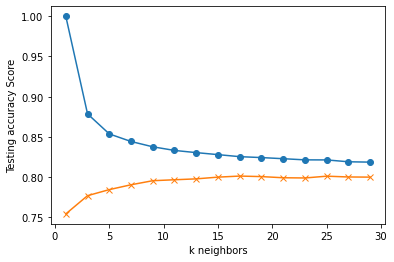

In [7]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Loop through different k values to see which has the highest accuracy
# NB: Standard scaled, 3 quantitative columns
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [8]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('For a standard scaled KNN model on the three original quantitative columns: k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

For a standard scaled KNN model on the three original quantitative columns: k=17 Test Acc: 0.801


In [14]:
# Save model

import joblib

# Save the model as a pickle in a file
joblib.dump(knn, 'knn_standard_three.pkl')

# # Load the model from the file
# knn_from_joblib = joblib.load('knn_standard_three.pkl')

# # Use the loaded model to make predictions
# knn_from_joblib.predict(X_test)



['knn_standard_three.pkl']

k: 1, Train/Test Score: 1.000/0.755
k: 3, Train/Test Score: 0.879/0.777
k: 5, Train/Test Score: 0.853/0.785
k: 7, Train/Test Score: 0.845/0.791
k: 9, Train/Test Score: 0.837/0.796
k: 11, Train/Test Score: 0.833/0.797
k: 13, Train/Test Score: 0.830/0.798
k: 15, Train/Test Score: 0.828/0.800
k: 17, Train/Test Score: 0.826/0.802
k: 19, Train/Test Score: 0.825/0.801
k: 21, Train/Test Score: 0.823/0.801
k: 23, Train/Test Score: 0.822/0.801
k: 25, Train/Test Score: 0.821/0.800
k: 27, Train/Test Score: 0.820/0.802
k: 29, Train/Test Score: 0.820/0.801


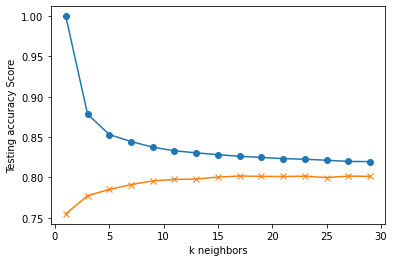

In [15]:
from sklearn.preprocessing import MinMaxScaler
# Create a StandardScater model and fit it to the training data

X_scaler = MinMaxScaler().fit(X_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Loop through different k values to see which has the highest accuracy
# NB: Standard scaled, 3 quantitative columns
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('For a min/max scaled KNN model on the three original quantitative columns: k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

For a min/max scaled KNN model on the three original quantitative columns: k=17 Test Acc: 0.802


In [17]:
# Save the model as a pickle in a file
joblib.dump(knn, 'knn_minmax_three.pkl')

['knn_minmax_three.pkl']

## Get dummy columns for categorical data and run KNN (standard, MinMax) on all data together

In [18]:

mushroom_category = pd.get_dummies(data=mushroom_data, columns=[
                                                'cap-surface',
                                                'cap-color',
                                                'does-bruise-or-bleed',
                                                'gill-attachment',
                                                'gill-spacing',
                                                'gill-color',
                                                'cap-shape',
                                                'stem-color',
                                                'has-ring',
                                                'ring-type',
                                                'habitat',
                                                'season'])
mushroom_category

,class,cap-diameter,stem-height,stem-width,cap-surface_dry,cap-surface_fibrous,cap-surface_fleshy,cap-surface_grooves,cap-surface_leathery,cap-surface_scaly,...,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,season_autumn,season_spring,season_summer,season_winter
0,edible,1.26,5.04,1.73,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,edible,10.32,4.68,19.44,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,poisonous,0.92,4.59,1.15,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,poisonous,4.27,4.55,6.52,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,edible,3.08,2.67,5.18,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,poisonous,12.79,9.60,25.61,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
61065,poisonous,2.42,3.52,2.20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
61066,edible,12.33,7.71,21.99,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
61067,poisonous,3.85,5.32,5.59,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [19]:
y = mushroom_category["class"]
target_names = ["edible", "poisonous"]

# Need to drop all non-integer columns for KNN
# X = mushroom_data.drop("class", axis=1)
X = mushroom_category.drop("class", axis=1)
X.head()

,cap-diameter,stem-height,stem-width,cap-surface_dry,cap-surface_fibrous,cap-surface_fleshy,cap-surface_grooves,cap-surface_leathery,cap-surface_scaly,cap-surface_shiny,...,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,season_autumn,season_spring,season_summer,season_winter
0,1.26,5.04,1.73,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,10.32,4.68,19.44,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0.92,4.59,1.15,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,4.27,4.55,6.52,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,3.08,2.67,5.18,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [20]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# StandardScaler with get_dummies columns

In [21]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [22]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/1.000
k: 3, Train/Test Score: 1.000/1.000
k: 5, Train/Test Score: 1.000/0.999
k: 7, Train/Test Score: 1.000/0.999
k: 9, Train/Test Score: 0.999/0.999


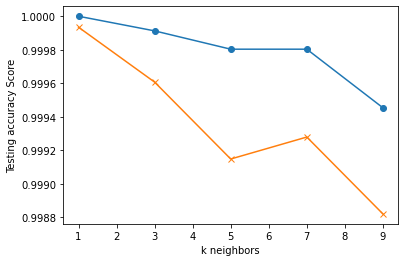

In [23]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 10, 2), train_scores, marker='o')
plt.plot(range(1, 10, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [25]:
# Note that k: 3 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('For a standard scaled KNN model on all columns: k=3 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

For a standard scaled KNN model on all columns: k=3 Test Acc: 1.000


In [ ]:
# Save the model as a pickle in a file
joblib.dump(knn, 'knn_standard_all.pkl')

# MinMaxScaler with get_dummies columns

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Create a StandardScaler model and fit it to the training data

X_scaler = MinMaxScaler().fit(X_train)

In [13]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/1.000
k: 3, Train/Test Score: 1.000/1.000
k: 5, Train/Test Score: 1.000/0.999
k: 7, Train/Test Score: 0.999/0.999
k: 9, Train/Test Score: 0.999/0.998


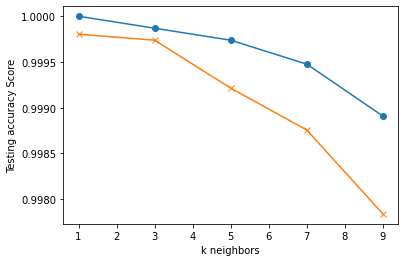

In [14]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 10, 2), train_scores, marker='o')
plt.plot(range(1, 10, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [15]:
# Note that k: 2 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)
print('For a MinMax scaled KNN model on all columns: k=2 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

For a MinMax scaled KNN model on all columns: k=2 Test Acc: 0.999


## Initial stab at neural network with MinMaxScaler

In [26]:
# Let's try a neural network

from tensorflow.keras.utils import to_categorical
# import numpy as np

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages

In [27]:
X = mushroom_category.drop("class", axis=1)
y = mushroom_category["class"]
print(X.shape, y.shape)

(61069, 92) (61069,)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [29]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [32]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [33]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Make a sequential model
model = Sequential()
# Add the first hidden layer with 6 nodes
model.add(Dense(units=6, activation='relu', input_dim=92))
# Add the output layer with 2 outputs
model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 558       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 572
Trainable params: 572
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
45801/45801 - 1s - loss: 0.4674 - acc: 0.7762
Epoch 2/100
45801/45801 - 1s - loss: 0.2722 - acc: 0.8872
Epoch 3/100
45801/45801 - 1s - loss: 0.1879 - acc: 0.9304
Epoch 4/100
45801/45801 - 1s - loss: 0.1421 - acc: 0.9526
Epoch 5/100
45801/45801 - 1s - loss: 0.1142 - acc: 0.9638
Epoch 6/100
45801/45801 - 1s - loss: 0.0954 - acc: 0.9712
Epoch 7/100
45801/45801 - 1s - loss: 0.0840 - acc: 0.9760
Epoch 8/100
45801/45801 - 1s - loss: 0.0748 - acc: 0.9783
Epoch 9/100
45801/45801 - 1s - loss: 0.0673 - acc: 0.9806
Epoch 10/100
45801/45801 - 1s - loss: 0.0602 - acc: 0.9825
Epoch 11/100
45801/45801 - 1s - loss: 0.0532 - acc: 0.9843
Epoch 12/100
45801/45801 - 1s - loss: 0.0478 - acc: 0.9857
Epoch 13/100
45801/45801 - 1s - loss: 0.0423 - acc: 0.9871
Epoch 14/100
45801/45801 - 1s - loss: 0.0386 - acc: 0.9884
Epoch 15/100
45801/45801 - 1s - loss: 0.0355 - acc: 0.9892
Epoch 16/100
45801/45801 - 1s - loss: 0.0337 - acc: 0.9898
Epoch 17/100
45801/45801 - 1s - loss: 0.0319 - acc: 0.9902
Epoch 

In [37]:
# Save the model
model.save("mushroom_trained.h5")

In [39]:
# Load the model
from tensorflow.keras.models import load_model
mushroom_model = load_model("mushroom_trained.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [40]:
model_loss, model_accuracy = mushroom_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

15268/15268 - 0s - loss: 0.0085 - acc: 0.9964
Normal Neural Network - Loss: 0.00853641852906574, Accuracy: 0.9963976740837097


In [45]:
# Grab just one data point to test with
test = np.expand_dims(X_test_scaled[1], axis=0)
test.shape

(1, 92)

In [46]:
# Make a prediction
print(f"Predicted class: {model.predict_classes(test)}")

Predicted class: [0]


In [47]:
X_test_scaled

array([[0.05335599, 0.18860017, 0.03629872, ..., 0.        , 1.        ,
        0.        ],
       [0.0895497 , 0.13914501, 0.12129327, ..., 0.        , 0.        ,
        0.        ],
       [0.15395072, 0.2665549 , 0.14459982, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10569244, 0.21626153, 0.15233561, ..., 0.        , 0.        ,
        0.        ],
       [0.1126593 , 0.14361554, 0.09927601, ..., 0.        , 0.        ,
        1.        ],
       [0.1299915 , 0.18161498, 0.13378955, ..., 0.        , 0.        ,
        0.        ]])